# PyTorch Workflow

In [1]:
what_were_covering = {1: "data (prepare & load)",
            2: "build model",
            3: "fitting the model to data (training)",
            4: "making predictions & evaluating the model (inference)",
            5: "saving & loading the model",
            6: "putting it together"}

what_were_covering

{1: 'data (prepare & load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions & evaluating the model (inference)',
 5: 'saving & loading the model',
 6: 'putting it together'}

In [2]:
import torch
from torch import nn # nn conatins all of PyTorch's "building blocks" for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.0+cu128'

## 1. Data (preparing & loading)

Data can be almost anything in machine learning.
* Excel spreadsheet
* Videos
* Audio
* Text
* etc ...

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, create some *known* data using the linear regression formula to create a straight line with *known* **parameters**.
* `Y = a + bX`, or `dependent (y) = intercept (bias) + slope (weight)*explanatory` 


In [3]:
# Create *known* parameters

weight = 0.7 # b or "slope" of the line
bias = 0.3 # a or "intercept" of the line

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds a dimension to the tensor
y = bias + weight * X # y = a + bX

X[:10], y[:10] # show first 10 values of X and y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y) # check length of X and y

(50, 50)

### Splitting data into training & test sets (very important!)

Create a training & test set with the data

In [5]:
# Create a training & testing split
train_split = int(0.8 * len(X)) # 80% of data for training
X_train, y_train = X[:train_split], y[:train_split] # first 80% of data for training

X_test, y_test = X[train_split:], y[train_split:] # last 20% of data for testing

len(X_train), len(y_train), len(X_test), len(y_test) # check lengths of training and testing data

(40, 40, 10, 10)

**How could we better visualize our data? Visialize it!**

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     # Train on training data & predict on test data
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots down the training data, test data, & and compares predictions 
    """

    plt.figure(figsize=(10, 7))

    # Plot the training data in orange
    plt.scatter(train_data, train_labels, c="orange", s=4, label="Training data")

    # Plot testing data in purple
    plt.scatter(test_data, test_labels, c="purple", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions if they exist
        plt.scatter(test_data, predictions, c="red", s=4, label="Predictions")

    # Show the model's legend
    plt.legend(prop={"size": 14})

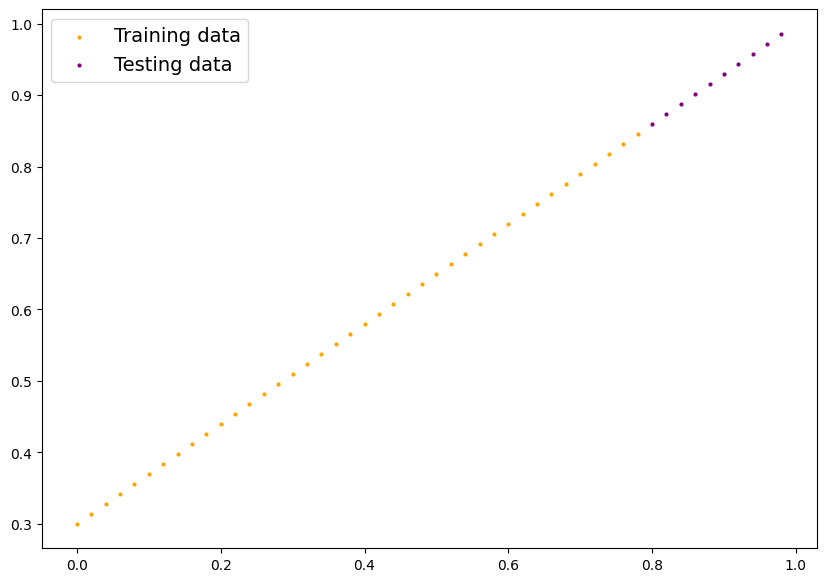

In [17]:
plot_predictions()

## 2. Build model

First PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data & adjust the random values to better represent (get closer to) the ideal values (weight & bias used to create the data)

The model does this through two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
from torch import nn

# Create a linear regression model
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        # Create random weight & bias parameters (refer to section 1.)
        self.weight = nn.Parameter(torch.randn(1, # Start with random weight & adjust it to the ideal weight
                                                requires_grad=True, # Is True by default; PyTorch will track the gradients of the parameter for use with torch.autograd & gradient descent
                                                dtype=torch.float) )# PyTorch works in datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1, # Start with random bias & adjust it to the ideal bias
                                             requires_grad=True,
                                             dtype=torch.float))
        
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weight*x + self.bias # Linear regression formula

    


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will se these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it you should overwrite forward()
* torch.optim - where the optimizers for in PyTorch exist to help with gradient descent
* def forward() ` ALL nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

We can check our model parameters or whats inside our model using `.parameters()`.

In [9]:
# Create a random seed 
torch.manual_seed(1337)

# Create an instance of the model (a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-2.0260], requires_grad=True),
 Parameter containing:
 tensor([-2.0655], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([-2.0260])), ('bias', tensor([-2.0655]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
X_test, y_test #

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
# Make predictions with model

with torch.inference_mode(): # Inference mode is used for making predictions without tracking gradients
    y_preds = model_0(X_test) # Make predictions on the test data

# with torch.no_grad(): # Alternative to inference mode, but inference mode is preferred
#     y_preds = model_0(X_test) # Make predictions on the test data

y_preds

tensor([[-3.6863],
        [-3.7268],
        [-3.7673],
        [-3.8079],
        [-3.8484],
        [-3.8889],
        [-3.9294],
        [-3.9699],
        [-4.0105],
        [-4.0510]])

In [13]:
y_test 

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

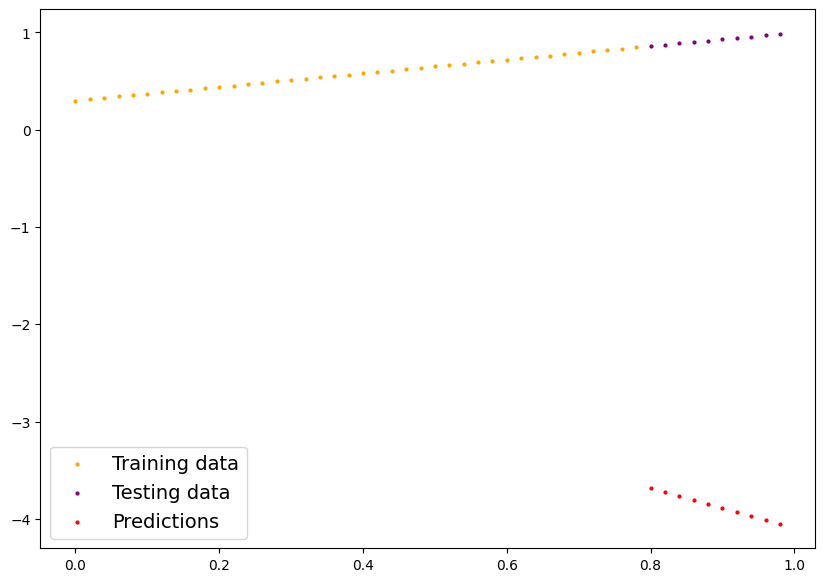

In [ ]:
plot_predictions(predictions=y_preds)
# Ideal model will have pink dots on top of purple dots (test data)

**Ideally want to minimize distance between each pink & purple dot**
* Can do so with Loss function to decrease "distance" between each coresponding data point to 0 (overlapping): https://docs.pytorch.org/docs/stable/nn.html#loss-functions
* Can then optimize with optimizer: https://docs.pytorch.org/docs/stable/optim.html#module-torch.optim

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (potentially random) to some *known* parameters. 

Or in other words poor representation to better representation.

One way to measure how poor/wrong a models predictions are is to use a loss function.

* Note: Loss function = Cost function = Criterion

Things required to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model & adjusts the model's parameters (e.g. weight & bias) to improve the loss function.
    * Inside the optimizer are 2 parameters:
        * `params` - The model parameters you will optimize, e.g `params=model_0.parameters()`
        * `lr` (learning rate) - A hyperparamter that defines how big/small the optimizer changes the parameters with each step (a small `lr` is a small change while a larger `lr` is a larger change)

Specifically for PyTorch, we need:

* A training loop
* A testing loop

In [15]:
list(model_0.parameters()) # Check the model parameters

[Parameter containing:
 tensor([-2.0260], requires_grad=True),
 Parameter containing:
 tensor([-2.0655], requires_grad=True)]

In [ ]:
# Checks out the models parameters (weight & bias determined by the model)
model_0.state_dict()

OrderedDict([('weight', tensor([-2.0260])), ('bias', tensor([-2.0655]))])

In [27]:
# Set up a loss function, L1 loss in this case or Mean Absolute Error
loss_fn = nn.L1Loss() # Measures how "wrong" our model's predictions are compared to the true labels (y_test)

# Set up an optimizer, Stochastic Gradient Descent in this case 
optimizer = torch.optim.SGD(params=model_0.parameters(), # SGD randomly adjusts the parameters of the model to minimize the loss function
                            lr=0.01) # lr is the learning rate, how much to adjust the parameters by decimal point (0.0001 is a small adjustment, 0.1 is a large adjustment)

**Q:** Which loss function & optimizer should I use?

**A:** This is problem specific that is learned with experience, 

For a regression problem (like here), a loss function of `nn.L1Loss()` & and optimizer like `torch.optim.SGD()` will suffice.

However, for classification problems such as classifying whether a given photo is a dog or cat, you would want to use a loss function such as `nn.BCELoss()` (Binary Cross Entropy Loss).

### Building a training loop (& a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data.
1. Forward pass (this involved data moving through our models `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimize zero grad.
4. Loss backward- move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**).
5. Optimizer step - use the optimizer to adjust our model's parameters to try & improve the loss (**gradient descent**).

In [ ]:
# An epoch is one complete loop through the training data... (hyperparameter becasue we set it manually)
epochs = 1 # Number of times to iterate through the training data

'''
Training loop:
'''
# 0. Loop through the data
for epoch in range(epochs): # Pass data through the model for a number of epochs, e.g. epochs = 1000 means the model will see the data 1000 times
    # Set model to training mode
    model_0.train() # Sets all parameters that require gradients to true (used for training mode)

    # 1. Forward pass (make predictions)
    y_preds = model_0(X_train) # Make predictions on the training data

    #2. Calculate the loss (how wrong the model's predictions are)
    loss = loss_fn(y_preds, y_train) # Compare the model's predictions to the ideal values (y_train)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Perform backpropagation on the loss w/ respect to the model parameters
    loss.backward()

    #5. Step the optimizer (preform gradient descent)
    optimizer.step() # By default how the optimizer changes will accumulate through the loop, so we need to zero them as in step #3. 


    '''
    Testing loop:
    '''
    #model_0.eval() # Sets all parameters that require gradients to false (used for inference mode)